## Budowniczy (*ang. Builder*)

**Typ**: kreacyjny \
**Zakres**: obiektowy

<div style="border: solid 1px;padding: 20px;text-align: center">
    Wzorzec <b>budowniczy</b> oddziela tworzenie złożonego obiektu od jego reprezentacji, dzięki czemu ten sam proces konstrukcji może prowadzić do powstania różnych reprezentacji.
</div>

Diagram klas

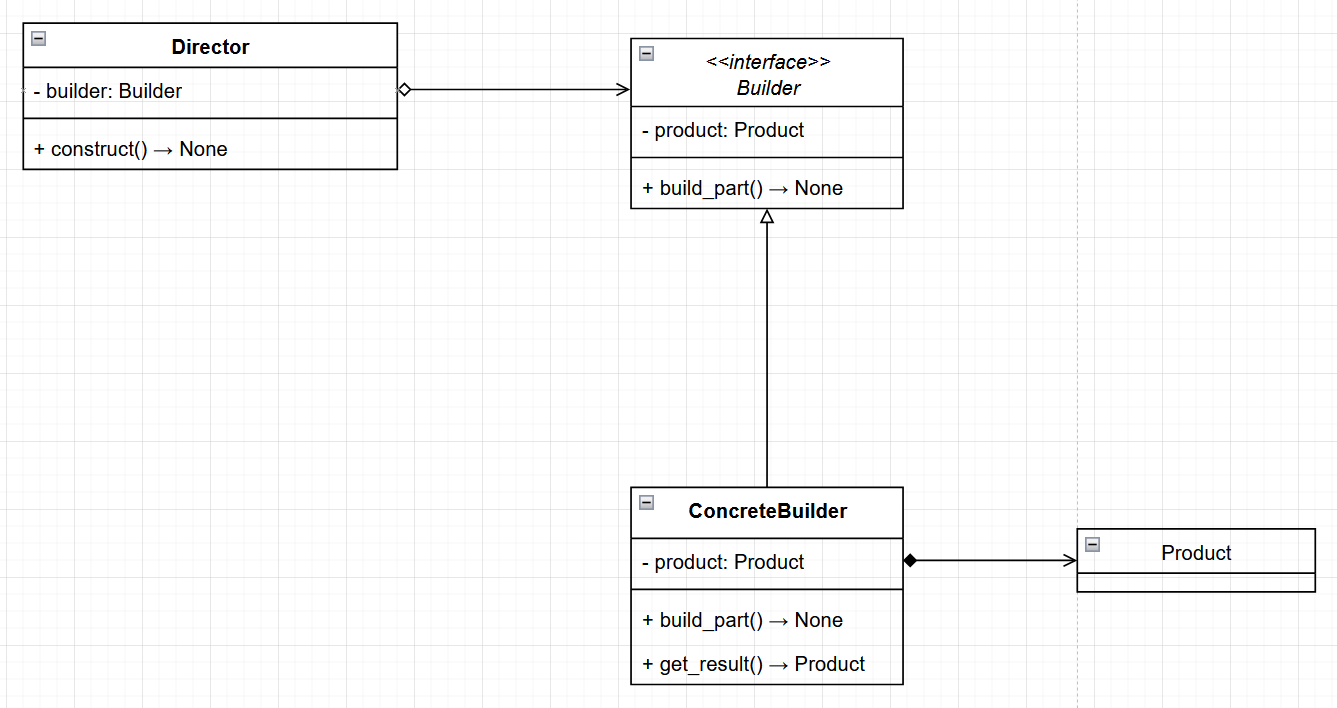

Diagram sekwencji

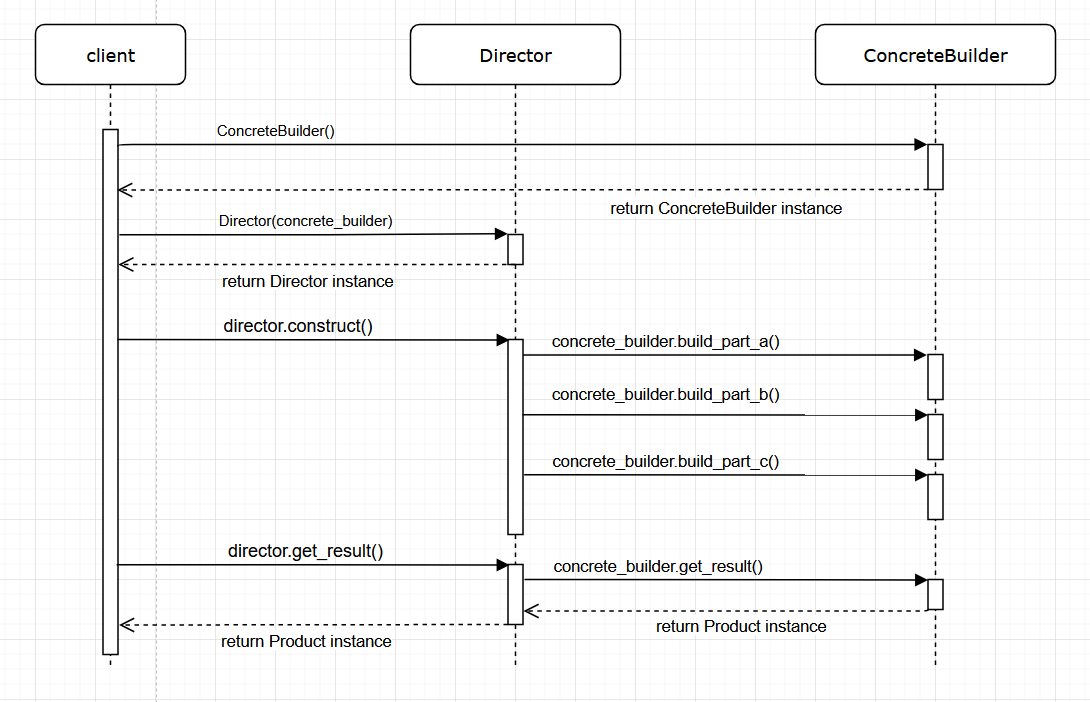

Na początku skupmy się na pierwszym fragmencie definicji - **Wzorzec budowniczy oddziela tworzenie złożonego obiektu od jego reprezentacji.**

Budowniczy pomaga w tworzeniu złożonych obiektów poprzez rozdzielenie procesu tworzenia obiektu od reprezentacji tego obiektu. Hermetyzuje proces tworzenia (konstruowania) obiektu w osobnej klasie. Ponadto pozwala na wieloetapowe tworzenie tego obiektu.

Zacznijmy od przykładu, który zilustruje problem rozwiązywany przez wzorzec.

In [1]:
class House:
    def __init__(self, wall, door, window, floor, garden, garage, swimming_pool):  # Wiele elementów
        # przerośnięty inicjalizator.
        self.wall = wall
        self.door = door
        self.window = window
        self.floor = floor
        self.garden = garden
        self.garage = garage
        self.swimming_pool = swimming_pool

    def display(self):
        print(f"Ściany: {self.wall}")
        print(f"Drzwi: {self.door}")
        print(f"Okna: {self.window}")
        print(f"Podłoga: {self.floor}")
        print(f"Ogród: {self.garden}")
        print(f"Garaż: {self.garage}")
        print(f"Basen: {self.swimming_pool}")


In [2]:
# client code
my_house = House(
    wall="murowane",
    door="antywłamaniowe",
    window="kuloodporne",
    floor="panele",
    garden="duży",
    garage=True,
    swimming_pool=True,
)  # Długa lista parametrów może być znakiem, że mamy do czynienia z jakimś błędem 
# projektowym i istnieje jakieś lepsze rozwiązanie.

my_house.display()

Ściany: murowane
Drzwi: antywłamaniowe
Okna: kuloodporne
Podłoga: panele
Ogród: duży
Garaż: True
Basen: True


Działa. Ale co z tą przydługą listą? Trudna do zrozumienia i utrzymywania. Które parametry są obowiązkowe, a które opcjonalne? Z kodu trudno powiedzieć. Czasami inicjalizator rozrasta się w ten sposób, kiedy dodajemy do projektu nowe funkcje.

Istotą problemu jest to, że obiekt pełni tutaj dwie funkcje:
- jest swoją reprezentacją
- odpowiada za tworzenie siebie

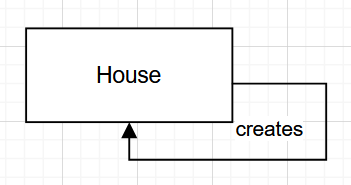

Jak to rozwiązać?

Wydzielić proces tworzenia obiektu i umieścić go w oddzielnej klasie. I taką klasę będziemy nazywali budowniczym. To dokładnie mówi pierwsza część definicji.

In [6]:
class House:
    # została sama reprezentacja
    def display(self):
        print(f"   Ściany: {self.wall}")
        print(f"   Drzwi: {self.door}")
        print(f"   Okna: {self.window}")
        print(f"   Podłoga: {self.floor}")
        print(f"   Ogród: {self.garden}")
        print(f"   Garaż: {self.garage}")
        print(f"   Basen: {self.swimming_pool}")
        print(f"   Kominek: {self.fireplace}")


In [1]:
# proces tworzenia oddelegowany do osobnej klasy

# TODO: Implement HouseBuilder

In [7]:
#client code
print("Moj dom:")
print("----------")

# TODO: use HouseBuilder

Moj dom:
----------
   Ściany: murowane
   Drzwi: antywłamaniowe
   Okna: kuloodporne
   Podłoga: panele
   Ogród: duży
   Garaż: True
   Basen: True
   Kominek: True


W tym prostym przykładzie zawarta jest istota wzorca budowniczego - oddelegowanie procesu tworzenia obiektu do osobnej klasy.

Dodatkowo zwróć uwagę na użycie metod zamiast bezpośredniego przypisywania wartości do atrybutów. Dzięki temu, w przypadku kiedy proces tworzenia poszczególnych części jest skomplikowany mamy czytelnie uporzadkowoany kod (oczywiście nie dotyczy to naszego przykładu, w który poglądowo ciałem tych metod jest tylko pojedyncze przypisanie).

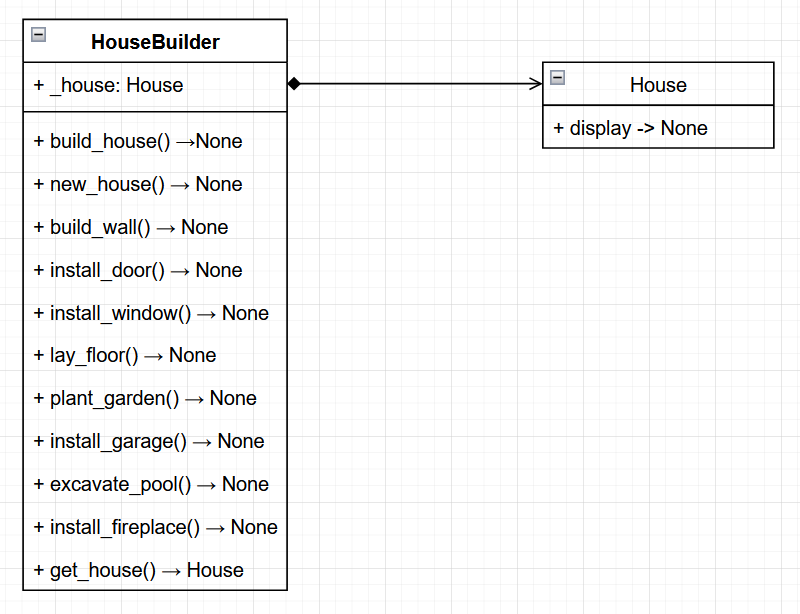

Teraz, kiedy omówioną mamy pierwszą część definicji możemy przejść do drugiej części - **dzięki czemu ten sam proces konstrukcji może prowadzić do powstania różnych reprezentacji.**

We wzorcu budowniczy nie chodzi wyłącznie o hermetyzację i ukrycie procesu tworzenia. Powstał również z myślą o możliwościach ponownego użycia i elastyczności całego procesu.

Budowniczy organizuje proces tworzenia obiektu w zestaw kolejnych kroków przetwarzania. Aby utworzyć obiekt, budowniczemu przekazuje się polecenie wykonania serii tych kroków. Ale czy zawsze musimy wywoływać wszystkie kroki? 

Nie!

Siła tego wzorca polega na tym, że nie ma potrzeby wykonywania każdego kroku — budowniczego można zaprojektować tak, aby realizował wyłącznie te etapy, które są niezbędne do uzyskania określonej konfiguracji obiektu.

Co więcej, wzorzec ten można rozszerzyć — możliwe jest definiowanie wariantów budowniczego, które implementują zmodyfikowane wersje poszczególnych kroków, umożliwiając tworzenie różnych odmian danego typu obiektu.

Zróbmy jeden wariant naszego budowniczego.

In [12]:
class CheapHouseBuilder:
    def build_house(self):
        self.new_house()
        self.build_wall()
        self.install_door()
        self.install_window()
        self.lay_floor()
        self.plant_garden()
        self.install_garage()
        self.excavate_pool()
        self.install_fireplace()

    def new_house(self):
        self._house = House()
        
    def build_wall(self):
        self._house.wall = 'drewniane'

    def install_door(self):
        self._house.door = "standard"

    def install_window(self):
        self._house.window = "pcv"

    def lay_floor(self):
        self._house.floor = "parkiet"

    def plant_garden(self):
        self._house.garden = "mały"

    def install_garage(self):
        self._house.garage = True

    def excavate_pool(self):
        self._house.swimming_pool = False

    def install_fireplace(self):
        self._house.fireplace = True

    def get_house(self):
        return self._house

In [13]:
#client code
print("Moj tani dom:")
print("----------")
builder = CheapHouseBuilder()
builder.build_house()
house = builder.get_house()
house.display()

Moj tani dom:
----------
   Ściany: drewniane
   Drzwi: standard
   Okna: pcv
   Podłoga: parkiet
   Ogród: mały
   Garaż: True
   Basen: False
   Kominek: True


Ok, ale teraz mamy dwie, niczym nie związane ze sobą klasę. A w definicji jest mowa o tym samym procesie konstrukcji. Gdzie w tym wszystkim jest wspólny proces konstrukcji?

Jeszcze nie ma. Ale po zdefiniowaniu interfejsu budowniczego będzie go mieli.

Pełny kod wzorca budowniczego.

In [1]:
import abc


# Abstrackyjny budowniczy (interfejs budowniczego)
class IHouseBuilder(abc.ABC):

    def get_house(self):
        return self._house

    def new_house(self):
        self._house = House()

    @abc.abstractmethod
    def build_house(self):
        pass

    @abc.abstractmethod
    def build_wall(self):
        pass

    @abc.abstractmethod
    def install_door(self):
        pass

    @abc.abstractmethod
    def install_window(self):
        pass

    @abc.abstractmethod
    def lay_floor(self):
        pass

    @abc.abstractmethod
    def plant_garden(self):
        pass

    @abc.abstractmethod
    def install_garage(self):
        pass

    @abc.abstractmethod
    def excavate_pool(self):
        pass

    @abc.abstractmethod
    def install_fireplace(self):
        pass
    

In [ ]:
# Pierwszy konkretny budowniczy
class HouseBuilder(IHouseBuilder):
    def build_house(self):
        self.new_house()
        self.build_wall()
        self.install_door()
        self.install_window()
        self.lay_floor()
        self.plant_garden()
        self.install_garage()
        self.excavate_pool()
        self.install_fireplace()

    def new_house(self):
        self._house = House()

    def build_wall(self):
        self._house.wall = "murowane"

    def install_door(self):
        self._house.door = "antywłamaniowe"

    def install_window(self):
        self._house.window = "kuloodporne"

    def lay_floor(self):
        self._house.floor = "panele"

    def plant_garden(self):
        self._house.garden = "duży"

    def install_garage(self):
        self._house.garage = True

    def excavate_pool(self):
        self._house.swimming_pool = True

    def install_fireplace(self):
        self._house.fireplace = True


In [14]:
# Drugi konkretny budowniczy
class CheapHouseBuilder(IHouseBuilder):
    def build_house(self):
        self.new_house()
        self.build_wall()
        self.install_door()
        self.install_window()
        self.lay_floor()
        self.plant_garden()
        self.install_garage()
        self.excavate_pool()
        self.install_fireplace()

    def new_house(self):
        self._house = House()

    def build_wall(self):
        self._house.wall = 'drewniane'

    def install_door(self):
        self._house.door = "standard"

    def install_window(self):
        self._house.window = "pcv"

    def lay_floor(self):
        self._house.floor = "parkiet"

    def plant_garden(self):
        self._house.garden = "mały"

    def install_garage(self):
        self._house.garage = True

    def excavate_pool(self):
        self._house.swimming_pool = False

    def install_fireplace(self):
        self._house.fireplace = True


In [2]:
# "Czysta" reprezentacja
class House:
    def display(self):
        print(f"   Ściany: {self.wall}")
        print(f"   Drzwi: {self.door}")
        print(f"   Okna: {self.window}")
        print(f"   Podłoga: {self.floor}")
        print(f"   Ogród: {self.garden}")
        print(f"   Garaż: {self.garage}")
        print(f"   Basen: {self.swimming_pool}")
        print(f"   Kominek: {self.fireplace}")


In [15]:
# client code
print("Mój dom:")
builder = MyHouseBuilder()
builder.build_house()
house = builder.get_house()
house.display()

print("\nMój tani dom:")
builder = CheapHouseBuilder()
builder.build_house()
house = builder.get_house()
house.display()

Mój dom:
   Ściany: murowane
   Drzwi: antywłamaniowe
   Okna: kuloodporne
   Podłoga: panele
   Ogród: duży
   Garaż: True
   Basen: True
   Kominek: True

Mój tani dom:
   Ściany: drewniane
   Drzwi: standard
   Okna: pcv
   Podłoga: parkiet
   Ogród: mały
   Garaż: True
   Basen: False
   Kominek: True


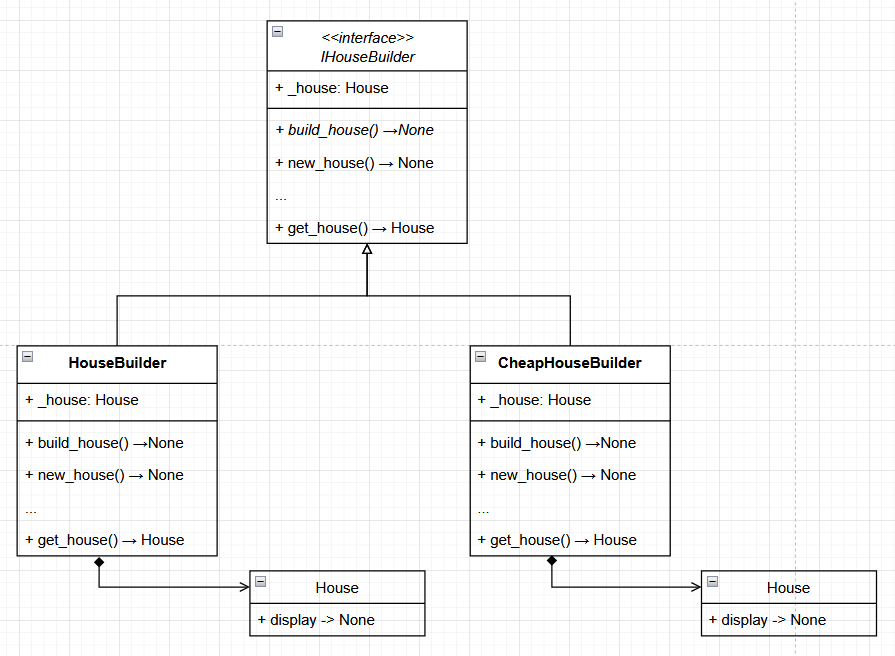

### Rozszerzony wzorzec budowniczego

Wyobraźmy sobie teraz, że nasi budowniczowie mają kilka różnych schematów tworzenia domów - build_basic_house, build_luxury_house, build_eco_house, ...

In [ ]:
class HouseBuilder(IHouseBuilder):
    def build_basic_house(self):
        self.new_house()
        self.build_wall()
        self.install_door()
        self.install_window()
        self.lay_floor()
        self.install_garage()

    def build_luxury_house(self):
        self.new_house()
        self.build_wall()
        self.install_door()
        self.install_window()
        self.lay_floor()
        self.plant_garden()
        self.install_garage()
        self.excavate_pool()
        self.install_fireplace()

    def new_house(self):
        self._house = House()

    def build_eco_house(self):
        ...

    def build_wall(self):
        self._house.wall = "murowane"

    def install_door(self):
        self._house.door = "antywłamaniowe"

    def install_window(self):
        self._house.window = "kuloodporne"

    def lay_floor(self):
        self._house.floor = "panele"

    def plant_garden(self):
        self._house.garden = "duży"

    def install_garage(self):
        self._house.garage = True

    def excavate_pool(self):
        self._house.swimming_pool = True

    def install_fireplace(self):
        self._house.fireplace = True


Będzie trzeba ten sam kod umieścić w każdym z naszych budowniczych. Powtarzamy się.

Dlaczego? \
Ponieważ znowu połączylismy dwie funkcje w jednej klasie. Tym razem umiejętność wykonania każdego z kroków i kolejność wykonywania poszczególnych kroków. Oddelegujmy kolejność wykonywania kroków do osobnej klasy. W nomenklaturze wzorca ta klasa nazywana jest dyrektorem.

In [3]:
# TODO: Implement Director


A budowniczemu pozostawiamy umiejętność wykonywania każdego z kroków.

In [17]:
class HouseBuilder(IHouseBuilder):
    def new_house(self):
        self._house = House()

    def build_wall(self):
        self._house.wall = "murowane"

    def install_door(self):
        self._house.door = "antywłamaniowe"

    def install_window(self):
        self._house.window = "kuloodporne"

    def lay_floor(self):
        self._house.floor = "panele"

    def plant_garden(self):
        self._house.garden = "duży"

    def install_garage(self):
        self._house.garage = True

    def excavate_pool(self):
        self._house.swimming_pool = True

    def install_fireplace(self):
        self._house.fireplace = True


In [18]:
print("Mój dom:")

# TODO: use Director

Mój dom:
   Ściany: murowane
   Drzwi: antywłamaniowe
   Okna: kuloodporne
   Podłoga: panele
   Ogród: duży
   Garaż: True
   Basen: True
   Kominek: True


Każdy z bohaterów naszej historii ma jedną, ściśle określoną odpowiedzialność:
- house - reprezentacja złożonego obiektu
- builder - potrafi zbudować każdy element złożonego obiektu
- director - potrafi kierować budową złożonego obiektu

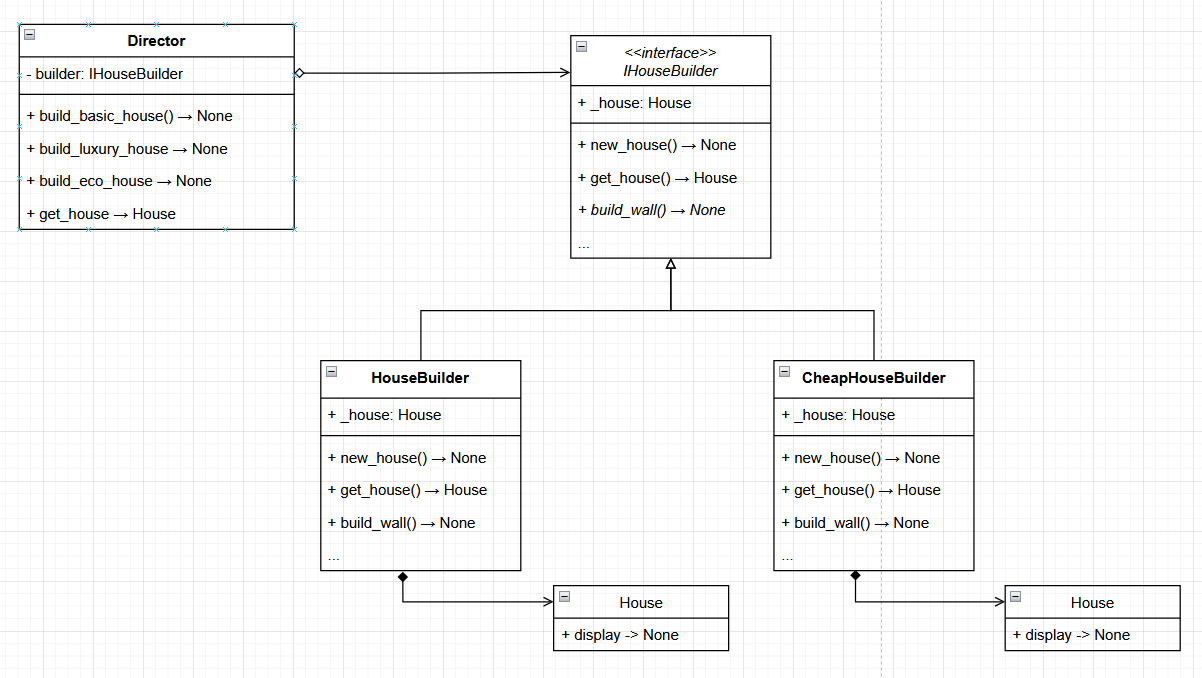

### Fluent interface (płynny intrefejs/interfejs łańcuchowy)

We wzorcu budowniczy często wspomina się o łańcuchowaniu metod (fluent interface), ponieważ jest idealnych miejsc na zastosowanie takiego interfejsu. Interfejs łańcuchowy polega na zaprojektowaniu metod klasy w taki sposób, żeby można było je wywoływać jedna za drugą, w postaci łańcucha wywołań:

```obj.method_a().method_b().method_c()...```

Taki interfejs implementuje się w klasie budowniczego, a dyrektor wykorzystuje go w swoich metodach. Zróbmy to w naszym przykładzie.

In [19]:
# TODO: Implement fluent interface

class HouseBuilder(IHouseBuilder):
    def new_house(self):
        self._house = House()
        
    def build_wall(self):
        self._house.wall = "murowane"

    def install_door(self):
        self._house.door = "antywłamaniowe"
        
    def install_window(self):
        self._house.window = "kuloodporne"
    
    def lay_floor(self):
        self._house.floor = "panele"
        
    def plant_garden(self):
        self._house.garden = "duży"
        
    def install_garage(self):
        self._house.garage = True
        
    def excavate_pool(self):
        self._house.swimming_pool = True
        
    def install_fireplace(self):
        self._house.fireplace = True


In [23]:
class Director:
    def __init__(self, builder: IHouseBuilder):
        self._builder = builder  # dyrektor kieruje konkretnym budowniczym

    # TODO: use fluent interface

    def get_house(self):
        return self._builder.get_house()


In [25]:
print("Mój dom:")
house_builder = HouseBuilder()
director = Director(house_builder)
director.build_luxury_house()
my_house = director.get_house()
my_house.display()


Mój dom:
   Ściany: murowane
   Drzwi: antywłamaniowe
   Okna: kuloodporne
   Podłoga: panele
   Ogród: duży
   Garaż: True
   Basen: True
   Kominek: True
